In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
N=10000
Wafer1 = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Wafer2 = np.random.normal(loc = 2.0, scale = 1, size = N)

In [2]:
import matplotlib.pyplot as plt
# plt.hist(Wafer1,bins=30)
plt.hist(Wafer2, bins=10)
plt.show()

<Figure size 640x480 with 1 Axes>

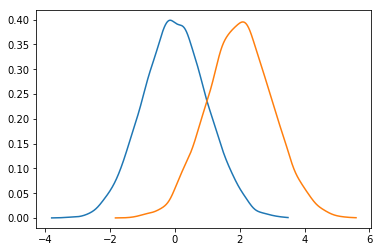

In [3]:
from scipy.stats import gaussian_kde
pdf1 = gaussian_kde(Wafer1)
pdf2 = gaussian_kde(Wafer2)
grid1 = np.linspace(min(Wafer1), max(Wafer1), num=1000)
grid2 = np.linspace(min(Wafer2), max(Wafer2), num=1000)
y1 = pdf1(grid1)
y2 = pdf2(grid2)
plt.plot(grid1, y1)
plt.plot(grid2, y2)
plt.show()

In [16]:
learning_rate = 0.01

import tensorflow as tf
from scipy.stats import gaussian_kde

def lin_model(X, w, b):
    print(np.shape(X))
    return tf.add(tf.scalar_mul(w, X), b)

def error_function(prediction, teacher):
    return tf.reduce_mean(tf.square(prediction - teacher))

def f(y):
    return 2*y+1

def wrap_pdf2(y):
    print("test")
    yy = 2*(y.numpy())+1.0
    t =  tf.convert_to_tensor(yy, dtype=tf.float32)
    print(y)
    print(t)
    return t

w = tf.Variable(1.0, name='slope')
b = tf.Variable(1.9, name='offset')

x = tf.constant(Wafer1, dtype=tf.float32)
xpd = tf.constant(pdf1(Wafer1), dtype=tf.float32)
#x = tf.placeholder(tf.float32, shape=(N))
#xpd = tf.placeholder(tf.float32, shape=(N))
y_hypo = lin_model(x, w, b)

with tf.GradientTape() as g:
    g.watch([w,b])
    ypd_hypo = tf.py_function(wrap_pdf2, [y_hypo], tf.float32)
    print(g.gradient(ypd_hypo, b))

(10000,)
test
tf.Tensor([1.703329   1.2633634  1.208173   ... 0.29136133 1.7173179  1.7151895 ], shape=(10000,), dtype=float32)
tf.Tensor([4.406658  3.5267267 3.416346  ... 1.5827227 4.434636  4.430379 ], shape=(10000,), dtype=float32)
None


In [22]:
def normal_model(x, sigma, mu):
    return 1/(sigma* tf.sqrt(2 * np.pi)) * tf.exp(-(x-mu)**2 / (2*sigma**2))

def lin_model(x, a, b):
    return tf.add(tf.scalar_mul(a,x),b)
#     return pdf2(tf.add(tf.scalar_mul(a,x),b))

def error_function(prediction, teacher):
    print(np.shape(prediction), np.shape(teacher))
    return tf.reduce_mean(tf.square(prediction-teacher))

sigma = tf.Variable(1.0)
mu = tf.Variable(0.)

a = tf.Variable(1.0)
b = tf.Variable(0.)

x = tf.placeholder(tf.float32, shape=len(Wafer1))
y = tf.placeholder(tf.float32, shape=len(Wafer2))
# y_hypo = normal_model(x,sigma,mu)
y_hypo = lin_model(x,a,b)

# normal_model_wrapper = tf.contrib.eager.py_func(func=normal_model, inp=[x, sigma, mu], Tout=tf.float32)

cost = error_function(y_hypo, y)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# Initializing
init = tf.global_variables_initializer()
trX = Wafer1
trY = Wafer2
# trY = pdf2(Wafer2)

with tf.Session() as sess:
    print(np.shape(trX), np.shape(trY))
    
    sess.run(init)
  # The session executes `log_huber` eagerly. Given the feed values below,
  # it will take the first branch, so `y` evaluates to 1.0 and
  # `dy_dx` evaluates to 2.0.
    for i in range(1000):
        sess.run(train_step, feed_dict={x:trX,y:trY})
        if i % 100 == 0:
#             print("%5d:(sigma,mu)=(%10.4f, %10.4f)" % (i, sess.run(sigma), sess.run(mu)))
            print("%5d:(a,b)=(%10.4f, %10.4f)" % (i, sess.run(a), sess.run(b)))

(10000,) (10000,)
(10000,) (10000,)
    0:(a,b)=(    0.9803,     0.0397)
  100:(a,b)=(    0.1370,     1.7255)
  200:(a,b)=(    0.0227,     1.9490)
  300:(a,b)=(    0.0072,     1.9787)
  400:(a,b)=(    0.0051,     1.9826)
  500:(a,b)=(    0.0048,     1.9831)
  600:(a,b)=(    0.0047,     1.9832)
  700:(a,b)=(    0.0047,     1.9832)
  800:(a,b)=(    0.0047,     1.9832)
  900:(a,b)=(    0.0047,     1.9832)
